In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv1D, MaxPooling2D, Dense,Flatten, Dropout,BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam 
import pandas as pd
import cv2 as cv2
import numpy as np 
from matplotlib import pyplot as plt 
import os 
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential


In [ ]:
 from google.colab import files 
 uploaded=files.upload()
 df=pd.read_csv('breast_cancer.csv')
 df.head(7)

Saving breast_cancer.csv to breast_cancer (3).csv


,,,,,,,,,,,,,,,,,,,,,,,,,,,569,30,malignant,benign
17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0


In [ ]:
dataset=r'r/content/drive/MyDrive/Cancer_images'
Yes_path=r'r/content/drive/MyDrive/Cancer_images/1'
No_path=r'r/content/drive/MyDrive/Cancer_images/0'


<class 'numpy.ndarray'>


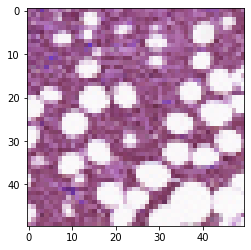

In [ ]:
image=cv2.imread("/content/drive/MyDrive/Cancer_images/yes/10253_idx5_x551_y401_class1.png")
print(type(image))
plt.imshow(image)

In [ ]:
pathdir = [Yes_path, No_path]
classes = ['Yes', 'No']
filepaths = []
labels = []
for i, j in zip(pathdir, classes):
    filelist = os.listdir()
    print(filelist)
    for vals in filelist:
        x = os.path.join(i, vals)
        filepaths.append(x)
        labels.append(j)
print(filepaths.__len__(), labels.__len__())


['.config', 'gdrive', 'drive', 'img2.png', 'breast_cancer (1).csv', 'Cancer_images.zip', 'breast_cancer (2).csv', 'breast_cancer.csv', 'sample_data']
['.config', 'gdrive', 'drive', 'img2.png', 'breast_cancer (1).csv', 'Cancer_images.zip', 'breast_cancer (2).csv', 'breast_cancer.csv', 'sample_data']
18 18


In [ ]:
print(filepaths[0:4])
print(labels[0:4])

print(filepaths[-4:])
print(labels[-4:])


['r/content/drive/MyDrive/Cancer_images/1/.config', 'r/content/drive/MyDrive/Cancer_images/1/gdrive', 'r/content/drive/MyDrive/Cancer_images/1/drive', 'r/content/drive/MyDrive/Cancer_images/1/img2.png']
['Yes', 'Yes', 'Yes', 'Yes']
['r/content/drive/MyDrive/Cancer_images/0/Cancer_images.zip', 'r/content/drive/MyDrive/Cancer_images/0/breast_cancer (2).csv', 'r/content/drive/MyDrive/Cancer_images/0/breast_cancer.csv', 'r/content/drive/MyDrive/Cancer_images/0/sample_data']
['No', 'No', 'No', 'No']


In [ ]:
dataset = list(zip(filepaths, labels))
pathframe = pd.DataFrame(dataset, columns=['filepaths', 'labels'])

In [ ]:
pathframe.__len__()
pathframe.tail()

,filepaths,labels
13,r/content/drive/MyDrive/Cancer_images/0/breast...,No
14,r/content/drive/MyDrive/Cancer_images/0/Cancer...,No
15,r/content/drive/MyDrive/Cancer_images/0/breast...,No
16,r/content/drive/MyDrive/Cancer_images/0/breast...,No
17,r/content/drive/MyDrive/Cancer_images/0/sample...,No


In [ ]:
print(pathframe['labels'].value_counts())

Yes    9
No     9
Name: labels, dtype: int64


In [ ]:
y=cancer.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
X.shape


(569, 30)

In [ ]:
Train, Test = train_test_split(pathframe, train_size=0.90, random_state=0)
Train_new, valid = train_test_split(Train, train_size = 0.90, random_state=0)
print(Train.shape, Test.shape, Train_new.shape, valid.shape)

(16, 2) (2, 2) (14, 2) (2, 2)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [ ]:
X_train.shape

(455, 30)

In [ ]:
X_test.shape

(114, 30)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train=X_train.reshape(455,30,1)
X_test=X_test.reshape(114,30,1)

In [ ]:
epochs=50
model = Sequential()
model.add(Conv1D(filters = 32 ,kernel_size = 2,activation = 'relu',input_shape = (30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters = 64 ,kernel_size = 2,activation = 'relu',input_shape = (30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_4 (Batc  (None, 29, 32)           128       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 29, 32)            0         
                                                                 
 conv1d_5 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_5 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 28, 64)           

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.00005),loss = 'binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)                 

Epoch 1/50
15/15 [==============================] - 2s 28ms/step - loss: 1.1930 - accuracy: 0.4901 - val_loss: 0.6660 - val_accuracy: 0.7456
Epoch 2/50
15/15 [==============================] - 0s 10ms/step - loss: 0.9286 - accuracy: 0.5736 - val_loss: 0.6312 - val_accuracy: 0.8333
Epoch 3/50
15/15 [==============================] - 0s 10ms/step - loss: 0.7059 - accuracy: 0.6791 - val_loss: 0.5967 - val_accuracy: 0.8684
Epoch 4/50
15/15 [==============================] - 0s 9ms/step - loss: 0.5673 - accuracy: 0.7341 - val_loss: 0.5626 - val_accuracy: 0.8772
Epoch 5/50
15/15 [==============================] - 0s 9ms/step - loss: 0.4665 - accuracy: 0.7868 - val_loss: 0.5265 - val_accuracy: 0.8684
Epoch 6/50
15/15 [==============================] - 0s 10ms/step - loss: 0.4756 - accuracy: 0.8088 - val_loss: 0.4935 - val_accuracy: 0.8596
Epoch 7/50
15/15 [==============================] - 0s 11ms/step - loss: 0.4057 - accuracy: 0.8308 - val_loss: 0.4603 - val_accuracy: 0.8509
Epoch 8/50
15/1

In [ ]:
def plot_learningCurve(history,epoch):
  epoch_range=range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()





In [ ]:
history.history

{'accuracy': [0.4901098906993866,
  0.5736263990402222,
  0.6791208982467651,
  0.7340659499168396,
  0.7868131995201111,
  0.8087912201881409,
  0.8307692408561707,
  0.8879120945930481,
  0.8593406677246094,
  0.8593406677246094,
  0.8659340739250183,
  0.898901104927063,
  0.903296709060669,
  0.89670330286026,
  0.892307698726654,
  0.9120879173278809,
  0.9098901152610779,
  0.9076923131942749,
  0.9186813235282898,
  0.9406593441963196,
  0.9120879173278809,
  0.9428571462631226,
  0.9318681359291077,
  0.9098901152610779,
  0.9252747297286987,
  0.9208791255950928,
  0.9230769276618958,
  0.9362637400627136,
  0.9406593441963196,
  0.9472527503967285,
  0.9362637400627136,
  0.9538461565971375,
  0.9230769276618958,
  0.9516483545303345,
  0.9472527503967285,
  0.9472527503967285,
  0.9516483545303345,
  0.9406593441963196,
  0.9406593441963196,
  0.9516483545303345,
  0.9340659379959106,
  0.9494505524635315,
  0.9362637400627136,
  0.9560439586639404,
  0.9494505524635315,
  0

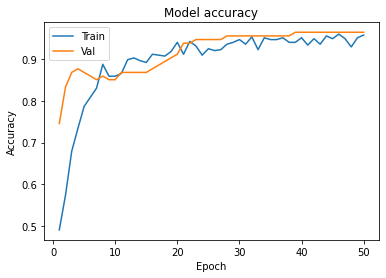

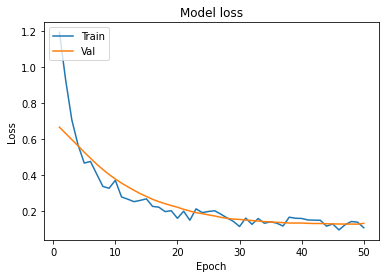

In [ ]:
plot_learningCurve(history,epochs)